In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Input data files are available in the read-only "../dataset/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Bad key "text.kerning_factor" on line 4 in
C:\Users\Zeus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


dataset\test.csv
dataset\train.csv
dataset\train_data_dict.csv


In [2]:
train_data=pd.read_csv('dataset/train.csv', header=0)
test_data=pd.read_csv('dataset/test.csv', header=0)

In [3]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [5]:
train_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [7]:
train_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
test_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

#### As we can see from the data there are two columns having null values in them namely : 
        * Bed Grade
        * City_Code_Patient
        
Lets deal with them first

As the numbers of missing data is very low so we are simply replacing the missing data with the maximum occuring element in Bed Grade

In [9]:
train_data['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [10]:


# train_data['Bed Grade'].fillna(-999, inplace = True) 
# test_data['Bed Grade'].fillna(-999, inplace = True) 

train_data['Bed Grade'].fillna(2.0, inplace = True) 
test_data['Bed Grade'].fillna(2.0, inplace = True) 




In [11]:
train_data["Bed Grade"].replace({2.0: "2", 3.0: "3", 4.0: "4", 1.0: "1"}, inplace=True)
test_data["Bed Grade"].replace({2.0: "2", 3.0: "3", 4.0: "4", 1.0: "1"}, inplace=True)


In [12]:
train_data['Bed Grade'].value_counts()

2    123784
3    110583
4     57566
1     26505
Name: Bed Grade, dtype: int64

To replace the missing data in City_Code_Patient we create a new label with id "ukn"

In [13]:
train_data['City_Code_Patient'].fillna("ukn", inplace = True) 
test_data['City_Code_Patient'].fillna("ukn", inplace = True) 

In [14]:
train_data['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
ukn       4532
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [16]:
train_data['City_Code_Hospital'] = train_data['City_Code_Hospital'].apply(str)
test_data['City_Code_Hospital'] = test_data['City_Code_Hospital'].apply(str)


train_data['City_Code_Patient'] = train_data['City_Code_Patient'].apply(str)
test_data['City_Code_Patient'] = test_data['City_Code_Patient'].apply(str)


train_data['Hospital_code'] = train_data['Hospital_code'].apply(str)
test_data['Hospital_code'] = test_data['Hospital_code'].apply(str)

In [17]:
numerical_columns=['case_id','Available Extra Rooms in Hospital','patientid',
                  'Visitors with Patient','Admission_Deposit']


#having case_id and patient_id makes no sense so its better to remove them 

numerical_columns_rx=['Available Extra Rooms in Hospital',
                  'Visitors with Patient','Admission_Deposit']


caterogical_columns=['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code',
                    'Type of Admission','Severity of Illness','Age','Bed Grade','City_Code_Hospital',
                    'City_Code_Patient','Hospital_code']

In [18]:
train_data['Type of Admission'].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

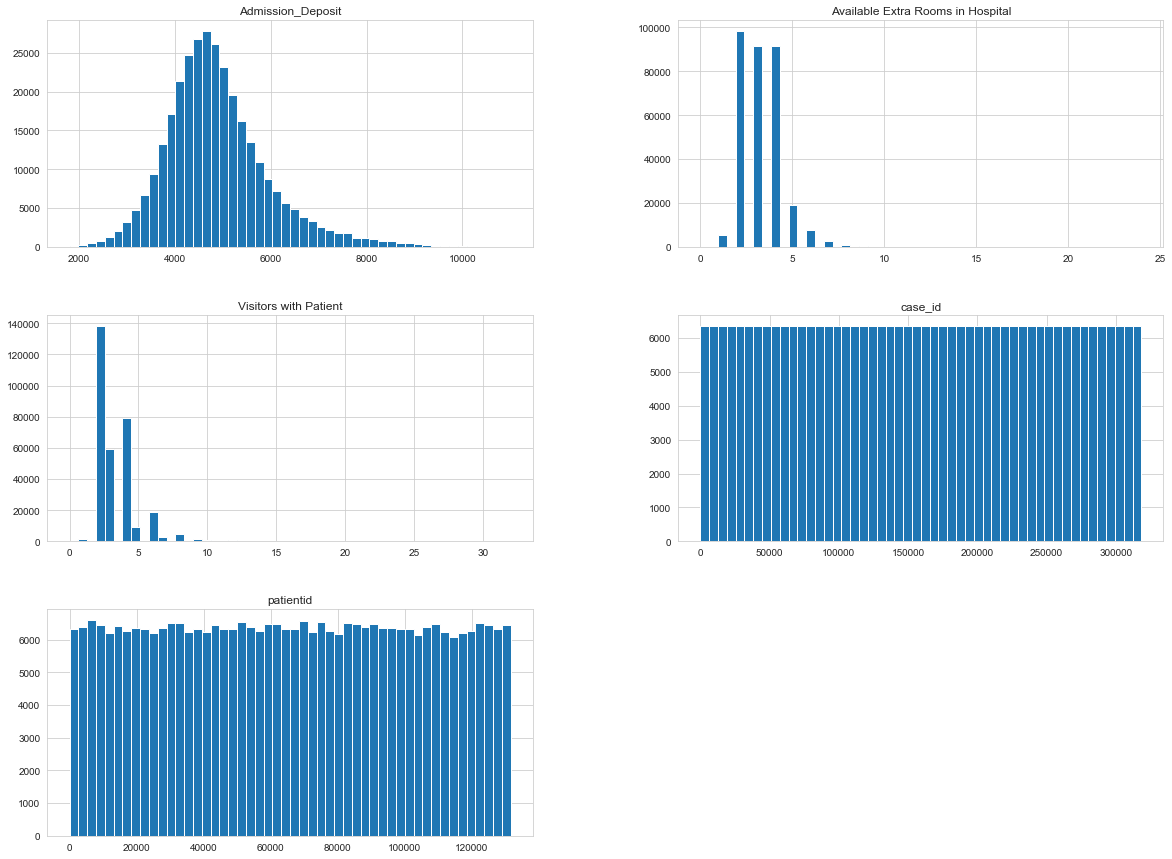

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[numerical_columns].hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B4BAF708>,
      dtype=object)

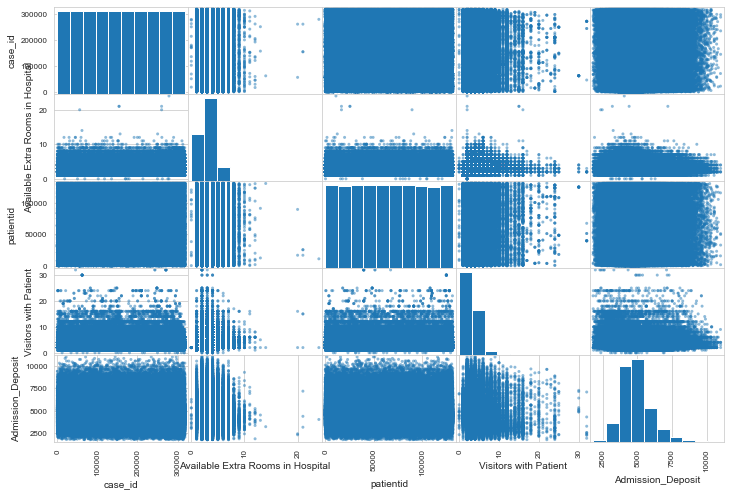

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data[numerical_columns], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163B4BEDAC8>,
      dtype=object)

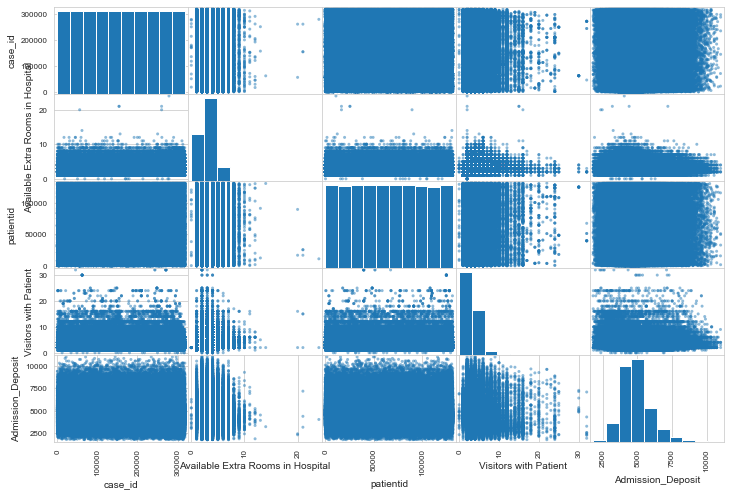

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data, figsize=(12, 8))

# Create the Correlation Graph 

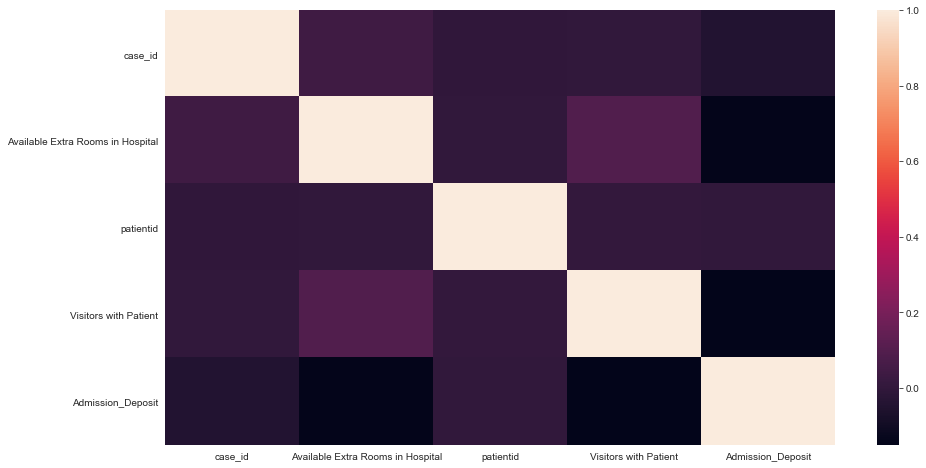

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr())

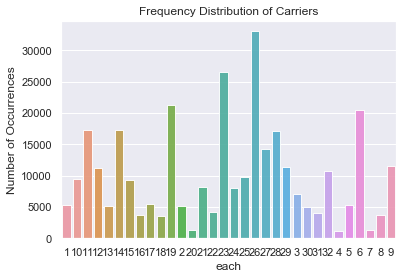

<Figure size 4320x1728 with 0 Axes>

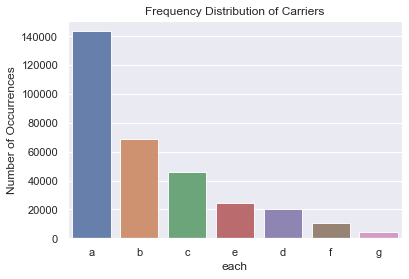

<Figure size 4320x1728 with 0 Axes>

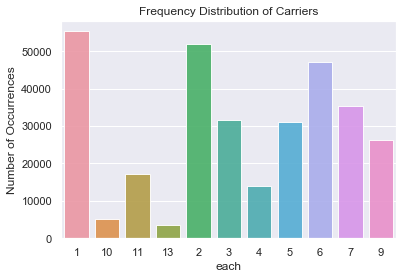

<Figure size 4320x1728 with 0 Axes>

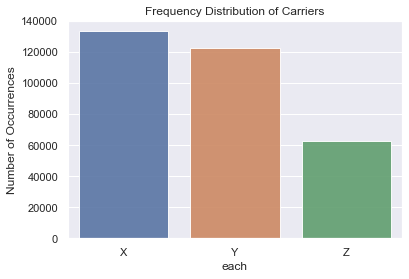

<Figure size 4320x1728 with 0 Axes>

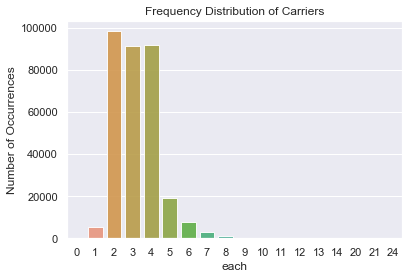

<Figure size 4320x1728 with 0 Axes>

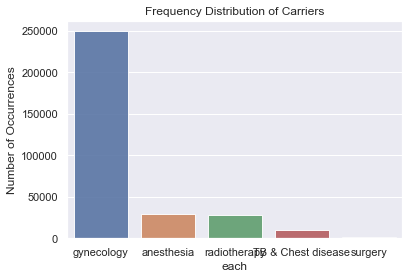

<Figure size 4320x1728 with 0 Axes>

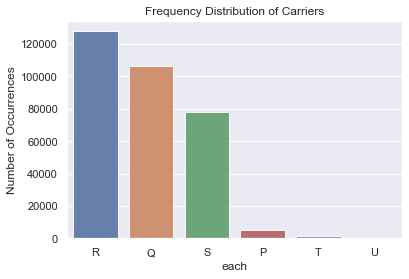

<Figure size 4320x1728 with 0 Axes>

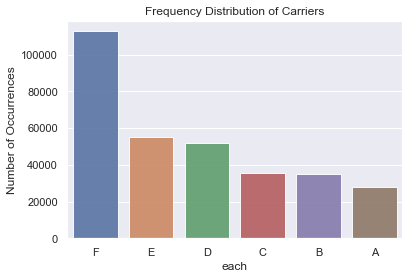

<Figure size 4320x1728 with 0 Axes>

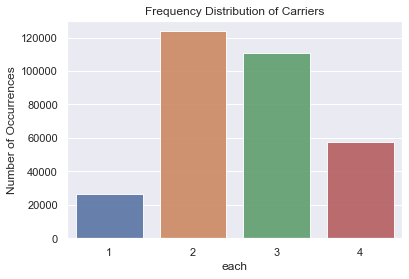

<Figure size 4320x1728 with 0 Axes>

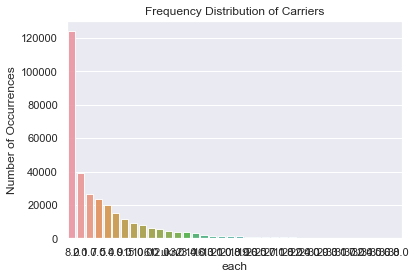

<Figure size 4320x1728 with 0 Axes>

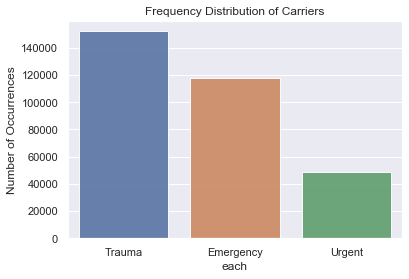

<Figure size 4320x1728 with 0 Axes>

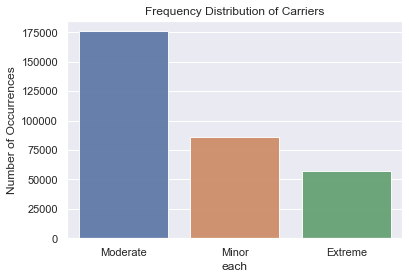

<Figure size 4320x1728 with 0 Axes>

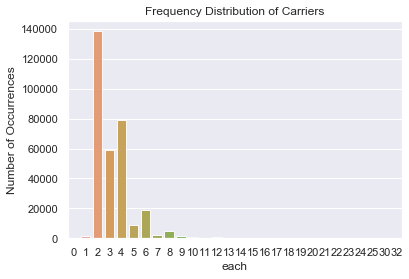

<Figure size 4320x1728 with 0 Axes>

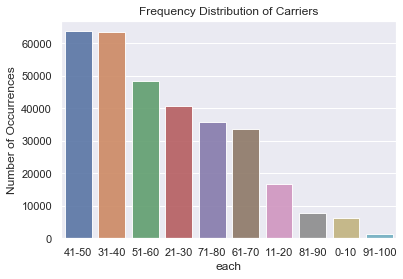

<Figure size 4320x1728 with 0 Axes>

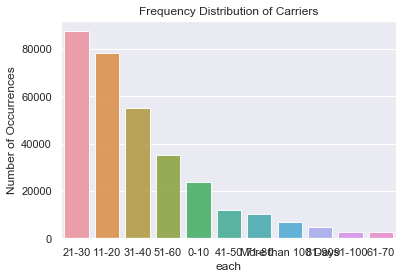

<Figure size 4320x1728 with 0 Axes>

In [21]:
for each in train_data.columns.to_list():
    #print(len(train_data[each].unique()),each)
    if len(train_data[each].unique())<40:
        carrier_count = train_data[each].value_counts()
        sns.set(style="darkgrid")
        sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
        plt.title('Frequency Distribution of Carriers')
        plt.ylabel('Number of Occurrences', fontsize=12)
        plt.xlabel('each', fontsize=12)
        plt.figure(figsize=(60,24))
        plt.show()

# Import the relevat modules

In [22]:
# Standard ML Models for comparison

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy


In [23]:
train_data[numerical_columns].describe()

,case_id,Available Extra Rooms in Hospital,patientid,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,3.197627,65747.579472,3.284099,4880.749392
std,91925.276847,1.168171,37979.936440,1.764061,1086.776254
min,1.000000,0.000000,1.000000,0.000000,1800.000000
25%,79610.250000,2.000000,32847.000000,2.000000,4186.000000
50%,159219.500000,3.000000,65724.500000,3.000000,4741.000000
75%,238828.750000,4.000000,98470.000000,4.000000,5409.000000
max,318438.000000,24.000000,131624.000000,32.000000,11008.000000


# One Hot Encoding Of the caterorical Columns  and transforming the data

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  object 
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  object 
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  object 
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")


from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="most_frequent")),
('std_scaler', StandardScaler()),
])



from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

num_attribs = numerical_columns_rx
cat_attribs = caterogical_columns




full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
train_data_prepared = full_pipeline.fit_transform(train_data)

test_data_prepared = full_pipeline.fit_transform(test_data)



In [26]:
train_data_prepared.toarray().shape

(318438, 131)

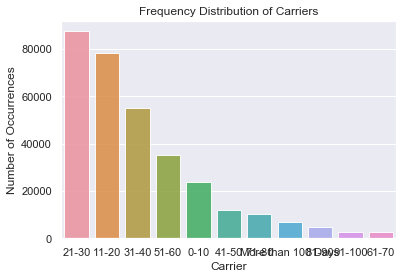

<Figure size 1440x576 with 0 Axes>

In [27]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Dealing with Categorical Data

In [28]:
train_data_prepared


<318438x131 sparse matrix of type '<class 'numpy.float64'>'
	with 4776570 stored elements in Compressed Sparse Row format>

# Transforming numpy array to dataframe

In [29]:
# train_data_transform = pd.DataFrame(data=train_data_prepared[0:,0:],index=[i for i in range(train_data_prepared.shape[0])],
#                                     columns=['f'+str(i) for i in range(train_data_prepared.shape[1])])

# Feature Engineering of the Admission Deposit Columns

In [30]:
# train_data_transform

In [31]:
# ['case_id', 'Hospital_code', 'City_Code_Hospital',
#        'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'Visitors with Patient', 'Admission_Deposit',
#        'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
#        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','City_Code_Patient',
#        'Age','Stay']

train_data_transformed=train_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(train_data_transform)

test_data_transformed=test_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(test_data_transform)

train_data_transformed=train_data_transformed[[  'Admission_Deposit',
       
       'Stay']]  #'case_id','patientid','Hospital_region_code','Hospital_code', 'City_Code_Hospital',
    #'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient','Hospital_type_code', 'Department', 'Ward_Type',
    #'City_Code_Patient','Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','Age'


test_data_transformed=test_data_transformed[[   'Admission_Deposit'
       ]] #'case_id','patientid','Hospital_region_code','Hospital_code', 'City_Code_Hospital',
    #'Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient'
    #'Hospital_type_code', 'Department', 'Ward_Type','City_Code_Patient',
       #'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',

NameError: name 'train_data_transform' is not defined

In [ ]:
# plt.figure(figsize=(15,8))
# sns.heatmap(train_data_prepared.corr())

# Creating Traing, test , and Validation Splits

In [32]:
valid_fraction = 0.05
valid_size = int(len(train_data) * valid_fraction)

train = train_data_prepared[:-2 * valid_size]
valid = train_data_prepared[-2 * valid_size:-valid_size]
test = train_data_prepared[-valid_size:]


train_l = train_data[:-2 * valid_size]
valid_l = train_data[-2 * valid_size:-valid_size]
test_l = train_data[-valid_size:]



In [33]:
#!pip install lightgbm

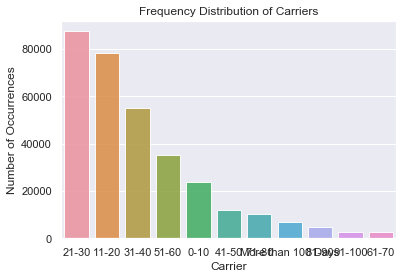

<Figure size 1440x576 with 0 Axes>

In [34]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Trying With XGBOOST 

In [35]:
#!pip install xgboost

In [36]:
# import xgboost

# from sklearn.metrics import mean_absolute_error
# from xgboost import XGBRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score



# feature_cols = train.columns.drop('Stay')

# # Define the model
# my_model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.15)

# # Fit the model
# my_model_3.fit(train[feature_cols], train['Stay'],
#              early_stopping_rounds=5,
#              eval_set=[(valid[feature_cols], valid['Stay'])],
#              verbose=False) # Your code here

# # Get predictions
# #predictions_3 = my_model_3.predict(X_valid)

# eval_score = accuracy_score(test['Stay'], my_model_3.predict(test[feature_cols]))

# print('Eval ACC: {}'.format(eval_score))



# Trying with Lightgbm

In [37]:
print(test.shape)
print(len(test_l['Stay']))


(15921, 131)
15921


In [38]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [
# {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
# {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
# ]
# forest_reg = RandomForestRegressor()
# grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
# scoring='neg_mean_squared_error',
# return_train_score=True)
# grid_search.fit(train_data_prepared, train_data['Stay'])

In [49]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter


params = {}
params['learning_rate'] = 0.06
params['max_depth'] = 50
params['n_estimators'] = 500
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.6
params['reg_lambda'] = 1.1
#params['class_weight']: {0: 0.12, 1: 0.38, 2: 0.42, 3: 0.27, 4: 0.07, 5: 0.18, 6: 0.02, 7: 0.06, 8: 0.03, 9: 0.02, 10: 0.04}

#feature_cols = train.columns.drop('Stay')

# dtrain = lgb.Dataset(train[feature_cols], label=train['Stay'])
# dvalid = lgb.Dataset(valid[feature_cols], label=valid['Stay'])

#param = {'num_leaves': 64, 'objective': 'multiclass'}
# params = {}
# params['learning_rate'] = 0.047
# params['max_depth'] = 50
# params['n_estimators'] = 3000
# params['objective'] = 'multiclass'
# params['boosting_type'] = 'gbdt'
# params['subsample'] = 0.7
# params['random_state'] = 42
# params['colsample_bytree']=0.7
# params['min_data_in_leaf'] = 55
# params['reg_alpha'] = 1.7
# params['reg_lambda'] = 1.11
# params['class_weight']: {0: 0.12, 1: 0.38, 2: 0.42, 3: 0.27, 4: 0.07, 5: 0.18, 6: 0.02, 7: 0.06, 8: 0.03, 9: 0.02, 10: 0.04}
#{0: 0.10, 1: 0.10, 2: 0.10, 3: 0.10, 4: 0.10, 5: 0.10, 6: 0.10, 7: 0.10, 8: 0.10, 9: 0.10, 10: 0.10}
# {0: 0.12, 1: 0.38, 2: 0.42, 3: 0.27, 4: 0.07, 5: 0.18, 6: 0.02, 7: 0.06, 8: 0.03, 9: 0.02, 10: 0.04}

clf = lgb.LGBMClassifier(**params)
clf.fit(train, train_l['Stay'], early_stopping_rounds=100, eval_set=[(valid, valid_l['Stay']),
        (test, test_l['Stay'])], eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(test_l['Stay'], clf.predict(test))

print('Eval ACC: {}'.format(eval_score))



[1]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.8712	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.83724
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.85585	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.82308
[3]	valid_0's multi_error: 0.747001	valid_0's multi_logloss: 1.83596	valid_1's multi_error: 0.73915	valid_1's multi_logloss: 1.8068
[4]	valid_0's multi_error: 0.742667	valid_0's multi_logloss: 1.81856	valid_1's multi_error: 0.735632	valid_1's multi_logloss: 1.79161
[5]	valid_0's multi_error: 0.732554	valid_0's multi_logloss: 1.80567	valid_1's multi_error: 0.728535	valid_1's multi_logloss: 1.7798
[6]	valid_0's multi_error: 0.724264	valid_0's multi_logloss: 1.79158	valid_1's multi_error: 0.71993	valid_1's multi_logloss: 1.7673
[7]	valid_0's multi_error: 0.715721	valid_0's multi_logloss: 1.77987	valid_1's multi_error: 0.712518	valid_1's multi_logloss: 1.75693
[8]	va

[62]	valid_0's multi_error: 0.606746	valid_0's multi_logloss: 1.59041	valid_1's multi_error: 0.614848	valid_1's multi_logloss: 1.57935
[63]	valid_0's multi_error: 0.606369	valid_0's multi_logloss: 1.5894	valid_1's multi_error: 0.613969	valid_1's multi_logloss: 1.57831
[64]	valid_0's multi_error: 0.606369	valid_0's multi_logloss: 1.58836	valid_1's multi_error: 0.613718	valid_1's multi_logloss: 1.57732
[65]	valid_0's multi_error: 0.606118	valid_0's multi_logloss: 1.58717	valid_1's multi_error: 0.613718	valid_1's multi_logloss: 1.57621
[66]	valid_0's multi_error: 0.605552	valid_0's multi_logloss: 1.58624	valid_1's multi_error: 0.613404	valid_1's multi_logloss: 1.57538
[67]	valid_0's multi_error: 0.605427	valid_0's multi_logloss: 1.58554	valid_1's multi_error: 0.613404	valid_1's multi_logloss: 1.57466
[68]	valid_0's multi_error: 0.606369	valid_0's multi_logloss: 1.58494	valid_1's multi_error: 0.613278	valid_1's multi_logloss: 1.57397
[69]	valid_0's multi_error: 0.606871	valid_0's multi_log

[123]	valid_0's multi_error: 0.603605	valid_0's multi_logloss: 1.55948	valid_1's multi_error: 0.607562	valid_1's multi_logloss: 1.54975
[124]	valid_0's multi_error: 0.603542	valid_0's multi_logloss: 1.55921	valid_1's multi_error: 0.607185	valid_1's multi_logloss: 1.54953
[125]	valid_0's multi_error: 0.603291	valid_0's multi_logloss: 1.55901	valid_1's multi_error: 0.607123	valid_1's multi_logloss: 1.54933
[126]	valid_0's multi_error: 0.603291	valid_0's multi_logloss: 1.5588	valid_1's multi_error: 0.607123	valid_1's multi_logloss: 1.54909
[127]	valid_0's multi_error: 0.602726	valid_0's multi_logloss: 1.55862	valid_1's multi_error: 0.607374	valid_1's multi_logloss: 1.54886
[128]	valid_0's multi_error: 0.603103	valid_0's multi_logloss: 1.55845	valid_1's multi_error: 0.607311	valid_1's multi_logloss: 1.54868
[129]	valid_0's multi_error: 0.603166	valid_0's multi_logloss: 1.55822	valid_1's multi_error: 0.607311	valid_1's multi_logloss: 1.54846
[130]	valid_0's multi_error: 0.602977	valid_0's m

[184]	valid_0's multi_error: 0.600653	valid_0's multi_logloss: 1.55015	valid_1's multi_error: 0.604862	valid_1's multi_logloss: 1.5409
[185]	valid_0's multi_error: 0.600402	valid_0's multi_logloss: 1.5501	valid_1's multi_error: 0.604799	valid_1's multi_logloss: 1.54083
[186]	valid_0's multi_error: 0.600214	valid_0's multi_logloss: 1.55002	valid_1's multi_error: 0.604736	valid_1's multi_logloss: 1.54078
[187]	valid_0's multi_error: 0.600528	valid_0's multi_logloss: 1.54991	valid_1's multi_error: 0.604799	valid_1's multi_logloss: 1.54069
[188]	valid_0's multi_error: 0.600276	valid_0's multi_logloss: 1.54985	valid_1's multi_error: 0.60505	valid_1's multi_logloss: 1.54062
[189]	valid_0's multi_error: 0.600151	valid_0's multi_logloss: 1.54976	valid_1's multi_error: 0.604924	valid_1's multi_logloss: 1.54051
[190]	valid_0's multi_error: 0.600025	valid_0's multi_logloss: 1.54967	valid_1's multi_error: 0.605113	valid_1's multi_logloss: 1.54039
[191]	valid_0's multi_error: 0.600151	valid_0's mul

[245]	valid_0's multi_error: 0.599585	valid_0's multi_logloss: 1.54618	valid_1's multi_error: 0.602663	valid_1's multi_logloss: 1.53693
[246]	valid_0's multi_error: 0.599585	valid_0's multi_logloss: 1.54611	valid_1's multi_error: 0.602726	valid_1's multi_logloss: 1.5369
[247]	valid_0's multi_error: 0.599523	valid_0's multi_logloss: 1.5461	valid_1's multi_error: 0.602852	valid_1's multi_logloss: 1.53688
[248]	valid_0's multi_error: 0.599648	valid_0's multi_logloss: 1.54607	valid_1's multi_error: 0.602726	valid_1's multi_logloss: 1.53686
[249]	valid_0's multi_error: 0.599271	valid_0's multi_logloss: 1.54602	valid_1's multi_error: 0.602914	valid_1's multi_logloss: 1.53683
[250]	valid_0's multi_error: 0.599209	valid_0's multi_logloss: 1.546	valid_1's multi_error: 0.602977	valid_1's multi_logloss: 1.53676
[251]	valid_0's multi_error: 0.599209	valid_0's multi_logloss: 1.54599	valid_1's multi_error: 0.60304	valid_1's multi_logloss: 1.53672
[252]	valid_0's multi_error: 0.599271	valid_0's multi

[306]	valid_0's multi_error: 0.599962	valid_0's multi_logloss: 1.54419	valid_1's multi_error: 0.602914	valid_1's multi_logloss: 1.53508
[307]	valid_0's multi_error: 0.600214	valid_0's multi_logloss: 1.5442	valid_1's multi_error: 0.603291	valid_1's multi_logloss: 1.53507
[308]	valid_0's multi_error: 0.5999	valid_0's multi_logloss: 1.54418	valid_1's multi_error: 0.602977	valid_1's multi_logloss: 1.535
[309]	valid_0's multi_error: 0.599837	valid_0's multi_logloss: 1.54418	valid_1's multi_error: 0.60304	valid_1's multi_logloss: 1.535
[310]	valid_0's multi_error: 0.5999	valid_0's multi_logloss: 1.54416	valid_1's multi_error: 0.60304	valid_1's multi_logloss: 1.53498
[311]	valid_0's multi_error: 0.599774	valid_0's multi_logloss: 1.54416	valid_1's multi_error: 0.603166	valid_1's multi_logloss: 1.53496
[312]	valid_0's multi_error: 0.599837	valid_0's multi_logloss: 1.54414	valid_1's multi_error: 0.602977	valid_1's multi_logloss: 1.53493
[313]	valid_0's multi_error: 0.599711	valid_0's multi_loglo

In [80]:

# preds = clf.predict(test_data_prepared)

# Counter(train['Stay'])

In [50]:
from sklearn.model_selection import GridSearchCV

best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)


clf = lgb.LGBMClassifier(**params)

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

#clf.fit(train_data_prepared, train_data['Stay'], eval_metric='multi_error', verbose=False)

grid_search = GridSearchCV(clf, param_grid, cv=5, verbose=3)
grid_search.fit(train_data_prepared, train_data['Stay'])

# eval_score_auc = roc_auc_score(df_train[label_col], clf.predict(df_train[feature_cols]))
eval_score_acc = accuracy_score(train_data['Stay'], grid_search.predict(train_data_prepared))

print('ACC: {}'.format(eval_score_acc))

{'learning_rate': 0.06, 'max_depth': 50, 'n_estimators': 258, 'objective': 'multiclass', 'boosting_type': 'gbdt', 'subsample': 0.7, 'random_state': 42, 'colsample_bytree': 0.7, 'min_data_in_leaf': 55, 'reg_alpha': 1.6, 'reg_lambda': 1.1}
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.431, total= 2.3min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.428, total= 2.2min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.5min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.427, total= 2.3min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.427, total= 2.4min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.406, total= 2.4min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.431, total= 3.0min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.428, total= 2.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.427, total= 2.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.427, total= 2.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 68.1min finished


ACC: 0.43552905118107765


In [52]:
preds = grid_search.predict(test_data_prepared)

Counter(preds)
submission = pd.DataFrame({'case_id':test_data['case_id'], 'Stay':preds})


# plt.rcParams['figure.figsize'] = (12, 6)
# lgb.plot_importance(clf)
# plt.show()

In [53]:
print(train_data['Stay'].unique())
print(submission['Stay'].unique())

['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']
['0-10' '51-60' '21-30' '11-20' '31-40' 'More than 100 Days' '81-90'
 '71-80' '91-100' '41-50']


In [54]:
submission

#"0": '0-10, "1": "11-20", "2": "21-30", "3": "31-40", "4": "41-50", "5": "51-60", "6": "61-70" , "7": "71-80", "8": "81-90", "9": "91-100", "10": "More than 100 Days"

submission["Stay"].replace({0: "0-10", 1: "11-20", 2: "21-30", 3: "31-40", 4: "41-50", 5: "51-60", 6: "61-70" , 7: "71-80", 8: "81-90", 9: "91-100", 10: "More than 100 Days"}, inplace=True)



In [55]:
submission.to_csv('submission.csv', index=False)

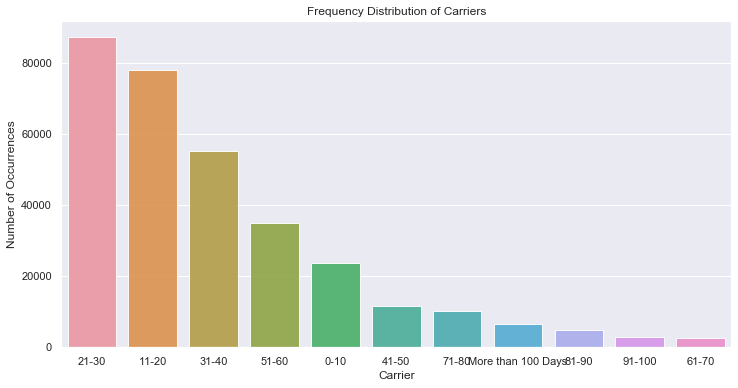

<Figure size 1440x576 with 0 Axes>

In [56]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()


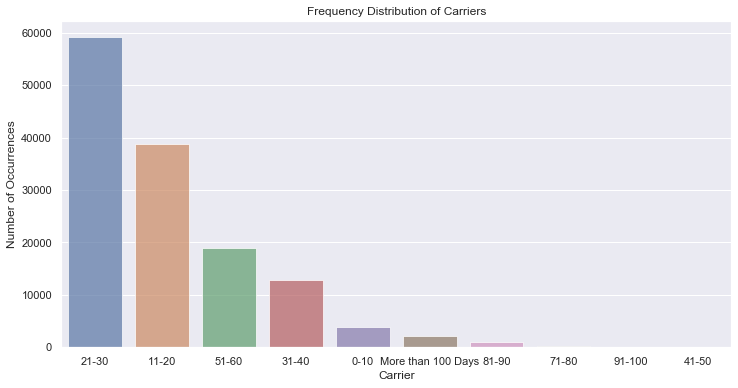

<Figure size 1440x576 with 0 Axes>

In [57]:
carrier_count = submission['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.7)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# PUBLIC ACCURACY SCORE ACHIVED IN AV PLATFORM  42.7784466090256